<a href="https://colab.research.google.com/github/borifgido/Borif_SPARK2024/blob/main/Simple_Linear_Regression_and_Multiple_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Example One: Simple Linear Regression
# To predict the percentage of marks that a student is expected to score based upon the number of hours they studied

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/

In [13]:


#Import the CSV dataset using pandas
dataset = pd.read_csv('/content/student_scores.csv')
# to explore the dataset (25 rows and 2 columns)
dataset.shape

(25, 2)

In [14]:
#To retrive the first 5 records from our dataset
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [15]:
# To see statistical details of the dataset
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


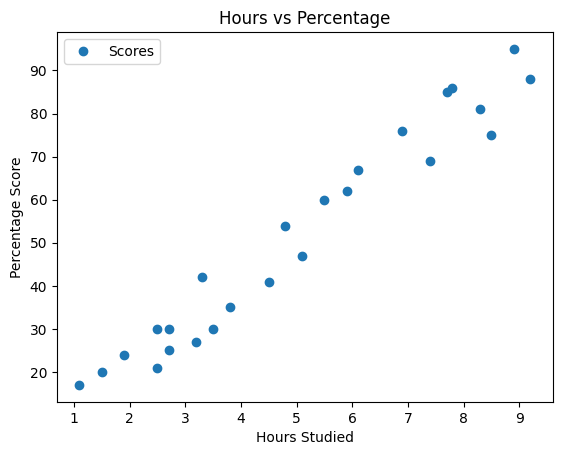

In [16]:
# To plot our data points on 2-D graph
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [17]:
# To extract the attributes and labels
X = dataset.iloc[:, :-1].values  #All the columns except the last one
y = dataset.iloc[:, 1].values # the second columon

#To split the dataset(20% of the dataset for test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training Algoritm (to train the model)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# To retrieve the intercept
print('The value of the intercept:', regressor.intercept_)
print('The value of the slope:', regressor.coef_)

The value of the intercept: 2.018160041434662
The value of the slope: [9.91065648]


In [18]:
# To predict the label values for the test datset
y_pred = regressor.predict(X_test)
# To compare the actual with the predicted value
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
# To evaluate the model (metrics)

# the value of root mean squared error is 4.64,
# which is less than 10% of the mean value of the percentages of all the students i.e. 51.48.
# This means that our algorithm did a decent job.
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


In [20]:
# Example Two: Multiple Linear Regression (Multiple variables)
# The same with simple linear regression. The difference lies in the evaluation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# To predict the gas consumptions (in millions of gallons) in 48 US states
dataset = pd.read_csv('/content/petrol_consumption.csv')
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [21]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [22]:
# Dividing the dataset into attributes and labels
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

# Splite the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
# Training Algoritm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# To find the cofficients of all the attributes
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [24]:
# To mak prediction using the test dataset
y_pred = regressor.predict(X_test)


# To compare the actual output value (57.677) with the predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [25]:
# To Evaluation Algorithm

# The value of root mean squared error is 60.07,
# which is slightly greater than 10% of the mean value of the gas consumption in all states.
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.822247478964734
Mean Squared Error: 4666.344787588369
Root Mean Squared Error: 68.31064915215174
